#### Combining Attack Angle and Zone

In [236]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.formula.api as smf

In [237]:
os.chdir('C:/Users/dalto/OneDrive/Pictures/Documents/Projects/Coding Projects/woba modeling/data')
df = pd.read_csv('pitch/pitch_cleaned.csv').drop(columns=['Unnamed: 0'])

##### Zones

In [238]:
vert_bounds = [
    df['sz_top'] * 0.7744, # Lower bound for zones 1, 2, 3 # 0
    df['sz_top'] * 0.9,    # Upper bound for zones 1, 2, 3, bottom for chase
    df['sz_top'] * 0.6488, # Lower bound for zones 4, 5, 6
    df['sz_top'] * 0.5232, # Lower bound for zones 7, 8, 9, top for chase zone
    df['sz_top'] * .333, # bottom for chase zone 
    df['sz_top'] * 1.1
]

# Define the conditions using vectorized comparisons on columns
conditions = [
    (df['plate_vert'] <= vert_bounds[4]),
    (vert_bounds[4] <= df['plate_vert']) & (df['plate_vert'] < vert_bounds[3]),
    (vert_bounds[3] <= df['plate_vert']) & (df['plate_vert'] < vert_bounds[2]),
    (vert_bounds[2] <= df['plate_vert']) & (df['plate_vert'] < vert_bounds[0]),
    (vert_bounds[0] <= df['plate_vert']) & (df['plate_vert'] < vert_bounds[1]),
    (vert_bounds[1] <= df['plate_vert']) & (df['plate_vert'] < vert_bounds[5]),
    (vert_bounds[5] <= df['plate_vert']),

    
]

# Define the corresponding values for each condition
choices = [1, 2, 3, 4, 5, 6, 7]

df['nzone'] = np.select(conditions, choices, default=0) 

In [239]:
horz_bounds = [
    -13.3/12, 
    -8/12,
    -2.7/12,
    2.7/12,
    8/12,
    13.3/12
]

conditions = [
    (horz_bounds[0] >= df['plate_horz']),
    (horz_bounds[0] <= df['plate_horz']) & (df['plate_horz'] < horz_bounds[1]),
    (horz_bounds[1] <= df['plate_horz']) & (df['plate_horz'] < horz_bounds[2]),
    (horz_bounds[2] <= df['plate_horz']) & (df['plate_horz'] < horz_bounds[3]),
    (horz_bounds[3] <= df['plate_horz']) & (df['plate_horz'] < horz_bounds[4]),
    (horz_bounds[4] <= df['plate_horz']) & (df['plate_horz'] < horz_bounds[5]),
    (horz_bounds[5] <= df['plate_horz'])
    

    
]

# Define the corresponding values for each condition
choices = [1, 2, 3, 4, 5, 6, 7]
df['vzone'] = np.select(conditions, choices, default=0) 

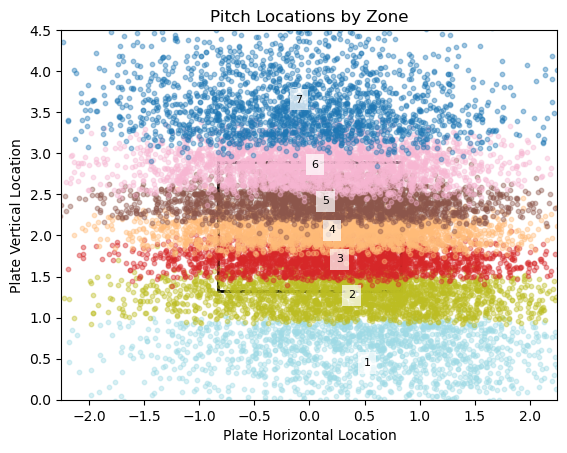

In [240]:
strike_zone_left = -0.833  # -10 inches in feet
strike_zone_right = 0.833  # +10 inches in feet
strike_zone_top = 2.9
strike_zone_bottom = 1.32

# Plot the strike zone as a rectangle
plt.gca().add_patch(
    plt.Rectangle(
        (strike_zone_left, strike_zone_bottom),
        strike_zone_right - strike_zone_left,
        strike_zone_top - strike_zone_bottom,
        fill=False, edgecolor='black', linewidth=2, linestyle='-', label='Strike Zone'
    )
)


df_judge = df[df['batter'] == 'jose altuve']

unique_zones = sorted(df_judge['nzone'].unique())
cmap = plt.get_cmap('tab20', len(unique_zones))

shuffled_indices = list(range(len(unique_zones)))
random.seed(987654) 
random.shuffle(shuffled_indices)
zone_colors = {zone: cmap(shuffled_indices[i]) for i, zone in enumerate(unique_zones)}

for zone in unique_zones:
    subset = df_judge[df_judge['nzone'] == zone]
    plt.scatter(
        subset['plate_horz'], subset['plate_vert'],
        color=zone_colors[zone], label=f'Zone {zone}',
        alpha=0.4, s=10
    )

plt.xlabel('Plate Horizontal Location')
plt.ylabel('Plate Vertical Location')
plt.ylim(0, 4.5)
plt.xlim(-2.25, 2.25)
for zone in unique_zones:
    subset = df_judge[df_judge['nzone'] == zone]
    if len(subset) > 0:
        avg_x = subset['plate_horz'].mean()
        avg_y = subset['plate_vert'].mean()
        plt.text(avg_x, avg_y, str(zone), fontsize=8, ha='center', va='center', 
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
plt.title('Pitch Locations by Zone')
plt.show()

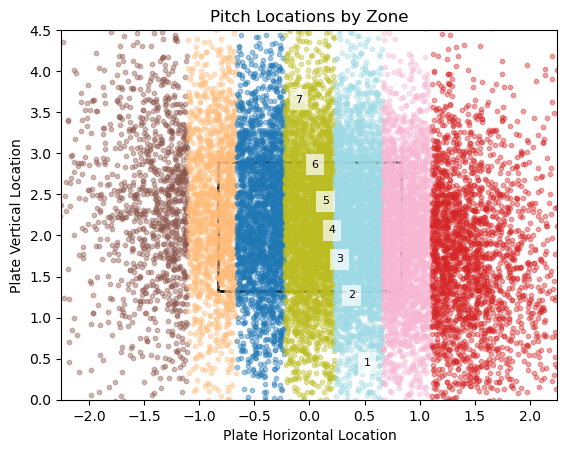

In [241]:
strike_zone_left = -0.833  # -10 inches in feet
strike_zone_right = 0.833  # +10 inches in feet
strike_zone_top = 2.9
strike_zone_bottom = 1.32

# Plot the strike zone as a rectangle
plt.gca().add_patch(
    plt.Rectangle(
        (strike_zone_left, strike_zone_bottom),
        strike_zone_right - strike_zone_left,
        strike_zone_top - strike_zone_bottom,
        fill=False, edgecolor='black', linewidth=2, linestyle='-', label='Strike Zone'
    )
)


df_judge = df[df['batter'] == 'jose altuve']

unique_zones = sorted(df_judge['nzone'].unique())
cmap = plt.get_cmap('tab20', len(unique_zones))

shuffled_indices = list(range(len(unique_zones)))
random.seed(987657) 
random.shuffle(shuffled_indices)
zone_colors = {zone: cmap(shuffled_indices[i]) for i, zone in enumerate(unique_zones)}

for zone in unique_zones:
    subset = df_judge[df_judge['vzone'] == zone]
    plt.scatter(
        subset['plate_horz'], subset['plate_vert'],
        color=zone_colors[zone], label=f'Zone {zone}',
        alpha=0.4, s=10
    )

plt.xlabel('Plate Horizontal Location')
plt.ylabel('Plate Vertical Location')
plt.ylim(0, 4.5)
plt.xlim(-2.25, 2.25)
for zone in unique_zones:
    subset = df_judge[df_judge['nzone'] == zone]
    if len(subset) > 0:
        avg_x = subset['plate_horz'].mean()
        avg_y = subset['plate_vert'].mean()
        plt.text(avg_x, avg_y, str(zone), fontsize=8, ha='center', va='center', 
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
plt.title('Pitch Locations by Zone')
plt.show()

#### attack angle bins

In [242]:
print(df['attack_angle'].describe())
print(df['attack_angle'].quantile(0.05))
print(df['attack_angle'].quantile(0.95))

count    677102.000000
mean          9.150100
std          11.791634
min         -89.757838
25%           1.980554
50%           9.449831
75%          16.919260
max          87.258474
Name: attack_angle, dtype: float64
-9.40501270555438
27.288169228090684


In [243]:
bin_edges = [-np.inf] + list(np.arange(-9, 0, 3)) + list(np.arange(0, 28, 2)) + [np.inf]
bin_edges_7 = [-np.inf] + list(np.arange(-6, 2, 3)) + list(np.arange(2, 18, 3)) + [np.inf]
bin_edges_1 = [-np.inf] + list(np.arange(0, 8, 4)) + list(np.arange(8, 22, 3)) + list(np.arange(22, 30, 4)) + [np.inf]

In [244]:
df['attack_bin'] = pd.NA
mask_zone1 = df['nzone'] == 1
mask_zone7 = df['nzone'] == 7
mask_other = ~mask_zone1 & ~mask_zone7

df.loc[mask_zone1, 'attack_bin'] = pd.cut(
    df.loc[mask_zone1, 'attack_angle'],
    bins=bin_edges_1,
    right=True  
)

df.loc[mask_zone7, 'attack_bin'] = pd.cut(
    df.loc[mask_zone7, 'attack_angle'],
    bins=bin_edges_7,
    right=True
)

df.loc[mask_other, 'attack_bin'] = pd.cut(
    df.loc[mask_other, 'attack_angle'],
    bins=bin_edges,
    right=True
)


#### woba value of ev

In [245]:
model = smf.ols('woba_value ~ launch_speed', data=df).fit()

#### attack direction bins

In [246]:
print(df['attack_direction'].describe())
print(df['attack_direction'].quantile(0.15))
print(df['attack_direction'].quantile(0.85))

count    677102.000000
mean          0.282370
std          20.451366
min        -179.937960
25%         -12.161640
50%           0.218745
75%          12.751864
max         179.924684
Name: attack_direction, dtype: float64
-18.857763730777396
19.5433991261099


In [255]:
bin_edges = [-np.inf] +  list(np.arange(-21, -12, 3)) + list(np.arange(-12, 12, 2)) +  list(np.arange(12, 21, 3)) + [np.inf]

In [256]:
df['d_bin'] = pd.cut(df['attack_direction'], bins=bin_edges, right=True)
df['group_d'] =  df.groupby(['d_bin', 'vzone', 'b_stands']).ngroup()

C:\Users\dalto\AppData\Local\Temp\ipykernel_21380\2772453757.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['group_d'] =  df.groupby(['d_bin', 'vzone', 'b_stands']).ngroup()


In [257]:
woba = df.groupby(['group_d'])['woba_value'].mean().reset_index()
woab_ev = df.groupby(['group_d'])['launch_speed'].mean().reset_index()
woba_count = df.groupby(['group_d']).size().reset_index()
woba = woba.merge(woba_count, on = ['group_d'])
woba = woba.merge(woab_ev, on = ['group_d'])
woba['value'] = woba['woba_value'] 

In [250]:
attack_bin_value_map = woba.groupby('group_d')['value'].mean()
df['direction_bin'] = df['group_d'].map(attack_bin_value_map)

#### attack value

In [251]:
df['group'] = df.groupby(['attack_bin', 'nzone']).ngroup()

In [252]:
woba = df.groupby(['group'])['woba_value'].mean().reset_index()
woab_ev = df.groupby(['group'])['launch_speed'].mean().reset_index()
woba_count = df.groupby(['group']).size().reset_index()
woba = woba.merge(woba_count, on = ['group'])
woba = woba.merge(woab_ev, on = ['group'])
# woba.loc[woba['launch_speed'] < 82, 'launch_speed'] = 82
woba['value'] = woba['woba_value']

In [253]:
attack_bin_value_map = woba.groupby('group')['value'].mean()
df['attack_bin'] = df['group'].map(attack_bin_value_map)

##### direction bin

In [254]:
df.to_csv('pitch/pitch_encoded.csv', index=False)